Proposed Trading Strategy
-----
Description to be added shortly.


In [2]:
import pandas as pd
import numpy as np
import os
import math
import sys
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sys.path.insert(0, os.path.join(os.getcwd(), 'code'))

import OrderBook as ob
import OrderUtil as ou
import TradingStrategySimulator as tss
import FillProbabilitySimulator as fps


In [3]:
#load in intc OrderBook data
book = ob.OrderBook(message_filename='INTC_message.csv', orderbook_filename='INTC_OrderBook.csv')

100% Accuracy
--------
Here we use an ideal 100% accurate model to see whether or not our strategy can be profitable

In [4]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, tick_size=100, next_move=True)
midprice_df.dropna(inplace=True)

backtester = tss.BacktesterSimulator(book=book, midprice_df=midprice_df, strategy=strat,
                                     max_exposure_dict={1:1, -1:1}, accuracy_rate=1,
                                     tick_size=100)
backtester.run_strategy_simulation()

Current time:        35004.165325977
Current pnl: 0.0
Current time:        35346.302228164
Current pnl: 1000.0
Current time:        35683.574315923
Current pnl: 2000.0
Current time:        36004.676315666
Current pnl: 2800.0
Current time:        36220.624942718
Current pnl: 3700.0
Current time:        36507.113394756
Current pnl: 4200.0
Current time:        37123.126168205
Current pnl: 5000.0
Current time:        37568.316281126004
Current pnl: 5300.0
Current time:        38169.133375705
Current pnl: 5400.0
Current time:        38754.000484555
Current pnl: 6000.0
Current time:        39440.59777616
Current pnl: 6100.0
Current time:        39803.404938539
Current pnl: 6300.0
Current time:        40205.605567611005
Current pnl: 6800.0
Current time:        40614.581165504
Current pnl: 7350.0
Current time:        40941.827805866
Current pnl: 7600.0
Current time:        41674.926337076
Current pnl: 7900.0
Current time:        42080.161586656
Current pnl: 8200.0
Current time:        42746.92

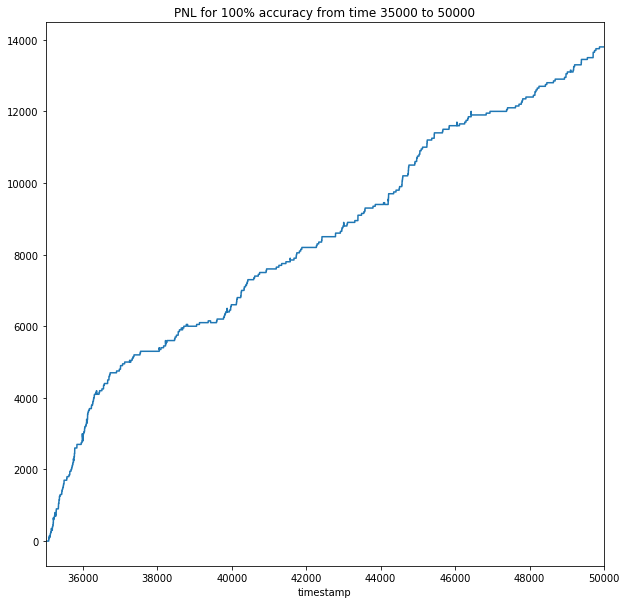

In [5]:
pnls = backtester._strategy_simulator.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL for 100% accuracy from time 35000 to 50000')
plt.show()

60% Accuracy
---------
Here we test a hypothetical model that has an average of 60% out of sample accuracy

In [6]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, tick_size=100, next_move=True)
midprice_df.dropna(inplace=True)

backtester = tss.BacktesterSimulator(book=book, midprice_df=midprice_df, strategy=strat,
                                     max_exposure_dict={1:1, -1:1}, accuracy_rate=0.6,
                                     tick_size=100)
backtester.run_strategy_simulation()

Current time:        35004.165325977
Current pnl: 0.0
Current time:        35346.302228164
Current pnl: 500.0
Current time:        35683.574315923
Current pnl: 1000.0
Current time:        36004.676315666
Current pnl: 1400.0
Current time:        36220.624942718
Current pnl: 2000.0
Current time:        36507.113394756
Current pnl: 2400.0
Current time:        37123.126168205
Current pnl: 3100.0
Current time:        37568.316281126004
Current pnl: 3400.0
Current time:        38169.133375705
Current pnl: 3400.0
Current time:        38754.000484555
Current pnl: 3800.0
Current time:        39440.59777616
Current pnl: 3900.0
Current time:        39803.404938539
Current pnl: 4000.0
Current time:        40205.605567611005
Current pnl: 4400.0
Current time:        40614.581165504
Current pnl: 4550.0
Current time:        40941.827805866
Current pnl: 4800.0
Current time:        41674.926337076
Current pnl: 5100.0
Current time:        42080.161586656
Current pnl: 5200.0
Current time:        42746.926

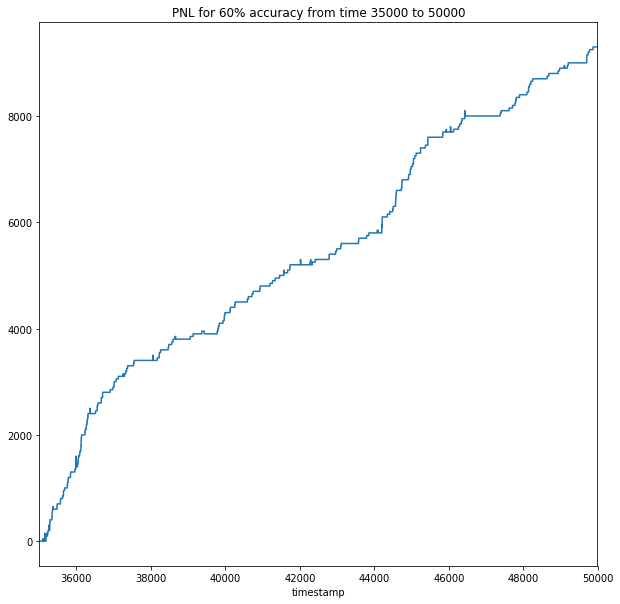

In [7]:
pnls = backtester._strategy_simulator.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL for 60% accuracy from time 35000 to 50000')
plt.show()

Strategy Tested Using Simple Prediction Model
--------
When bid level 1 quantity is greater than or equal to ask level 1 quantity we predict an up move, otherwise we predict a down move.

In [8]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, tick_size=100, next_move=True)
midprice_df.dropna(inplace=True)
pred = (midprice_df['bq1'] >= midprice_df['aq1']).astype(int)
pred = 2.0*(pred - 0.5)
backtester = tss.TradingStrategyBacktester(book=book, midprice_df=midprice_df, strategy=strat,
                                           predictions=pred,
                                           max_exposure_dict={1:1, -1:1}, 
                                           tick_size=100)
backtester.run_strategy()

Current time:        35004.165325977
Current pnl: 0.0
Current time:        35346.302228164
Current pnl: -600.0
Current time:        35683.574315923
Current pnl: -800.0
Current time:        36004.676315666
Current pnl: -1600.0
Current time:        36220.624942718
Current pnl: -2000.0
Current time:        36507.113394756
Current pnl: -2550.0
Current time:        37123.126168205
Current pnl: -2800.0
Current time:        37568.316281126004
Current pnl: -4100.0
Current time:        38169.133375705
Current pnl: -4500.0
Current time:        38754.000484555
Current pnl: -4400.0
Current time:        39440.59777616
Current pnl: -4600.0
Current time:        39803.404938539
Current pnl: -5100.0
Current time:        40205.605567611005
Current pnl: -5900.0
Current time:        40614.581165504
Current pnl: -6500.0
Current time:        40941.827805866
Current pnl: -7100.0
Current time:        41674.926337076
Current pnl: -7700.0
Current time:        42080.161586656
Current pnl: -8100.0
Current time:  

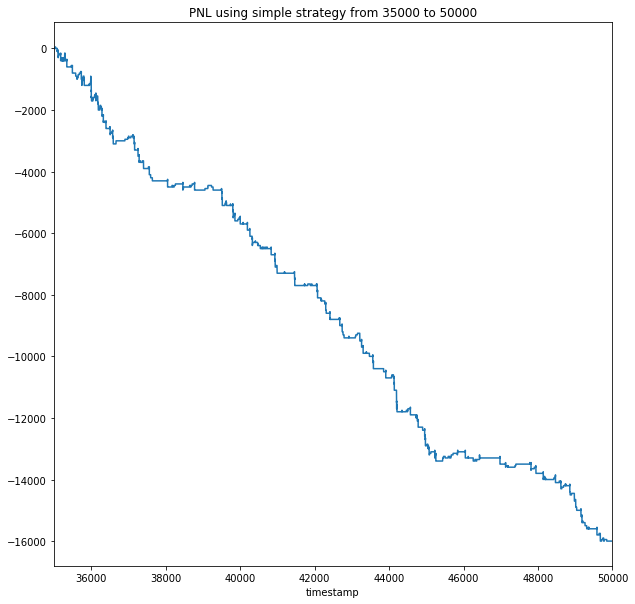

In [9]:
pnls = backtester.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL using simple strategy from 35000 to 50000')
plt.show()